In [55]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict

In [56]:
# define a StateGraph
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    BMI:float
    Category:str

In [57]:
def calculate_BMI(state:BMIState) -> BMIState:
    weight=state["weight_kg"]
    height=state["height_m"]
    BMI=weight/(height**2)
    state["BMI"]=round(BMI,2)
    return state


In [58]:
def label_bmi(state:BMIState)->BMIState:
    BMI=state["BMI"]
    if BMI < 18.5:
     state["Category"]="Underweight"
    elif 18.5 <= BMI<25:
     state["Category"]="Normal"
    elif 25<=BMI<30:
     state["Category"]="overweight"
    else:
     state["Category"]="Obese"

    return state


    

In [59]:
state=StateGraph(BMIState)

state.add_node('calculate_BMI',calculate_BMI)
state.add_node('label_bmi',label_bmi)
state.add_edge(START,'calculate_BMI')
state.add_edge('calculate_BMI','label_bmi')
state.add_edge('label_bmi',END)
workflow=state.compile()




In [60]:
final_state=workflow.invoke({"weight_kg":70,"height_m":1.8})
print(final_state)

{'weight_kg': 70, 'height_m': 1.8, 'BMI': 21.6, 'Category': 'Normal'}


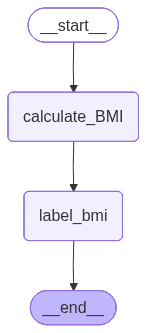

In [61]:
from IPython.display import Image

# Visualize the graph
Image(workflow.get_graph().draw_mermaid_png())